Day: 20 	 at community: city 	 the AvePref is: 0.08923321374538576
Day: 22 	 at community: town - 	 the AvePref is: -0.5432557980554134
Day: 25 	 at community: city 	 the AvePref is: 0.08877779708017508
Day: 26 	 at community: town + 	 the AvePref is: 0.6149618227228649
Day: 27 	 at community: city 	 the AvePref is: 0.08877779708017518
Day: 31 	 at community: town - 	 the AvePref is: -0.5432557980554134
Day: 36 	 at community: city 	 the AvePref is: 0.08877779708017518
Day: 37 	 at community: town + 	 the AvePref is: 0.6149618227228649


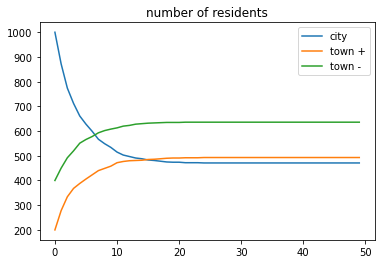

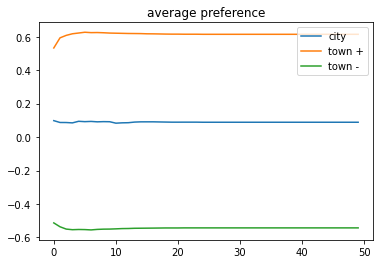

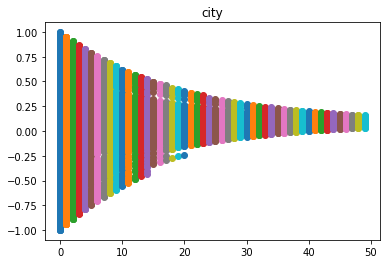

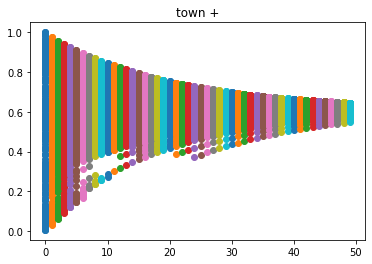

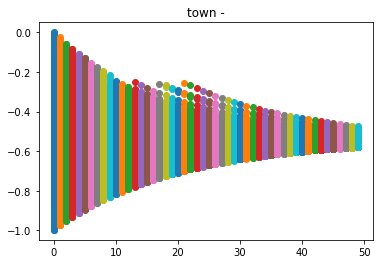

In [1]:
#Topic 6 Population Migration

import math
import random
import matplotlib.pyplot as plt 

# Change code here
stdID = 1513
stdIDstr = str(stdID)

#-----------------------------#
# Define Agent class

prefEvolRate = 0.05
probMigr = 0.2

class Agent():
    ## Update own preference 
    def pref_evol(self):
        self.pref += prefEvolRate*(self.com.prefAveCurrent - self.pref)
    ## Migrate between communities
    def com_migrate(self):
        if random.uniform(0,1) < probMigr:
            self.com = max(comList, key=lambda com: -abs(com.prefAveCurrent - self.pref))

class AgentPos(Agent):
    ## Constructor
    def __init__(self, com):
        self.type = 'pos'
        self.pref = random.uniform(0,1)
        self.com = com

class AgentNeg(Agent):
    ## Constructor
    def __init__(self, com):
        self.type = 'neg'
        self.pref = random.uniform(-1,0)
        self.com = com

# Define Community class
class Community():
    def __init__(self, label=None):
        self.label = label
        self.numResidentsCurrent = 0
        self.prefAveCurrent = 0
        self.prefDistHist = []
        self.numResidentsHist = []
        self.prefAveHist = []
        self.jerrorHist=[]
    
    def __str__(self):
        return self.label

City = Community('city')
PosTown = Community('town +')
NegTown = Community('town -')
comList = [City, PosTown, NegTown]

# useful functions
def state_update():
    for com in comList:
        com.prefDistCurrent = []
    for agent in agentsList:
        pref = agent.pref
        agent.com.prefDistCurrent.append(pref)
    for com in comList:
        com.numResidentsCurrent = len(com.prefDistCurrent)
        com.prefAveCurrent = sum(com.prefDistCurrent)/com.numResidentsCurrent
        com.prefDistHist.append(com.prefDistCurrent)
        com.numResidentsHist.append(com.numResidentsCurrent)
        com.prefAveHist.append(com.prefAveCurrent)
        
# Simulation
## Initial Parameters
initNmPosHome = 100*(1+int(stdIDstr[0]))
initNmPosCity = 100*(1+int(stdIDstr[1]))
iniNmNegHome = 100*(1+int(stdIDstr[2]))
initNmNegCity = 100*(1+int(stdIDstr[3]))

numDays = 50

agentsList = (
    [AgentPos(PosTown) for k in range(initNmPosHome)] + 
    [AgentPos(City) for k in range(initNmPosCity)] + 
    [AgentNeg(NegTown) for k in range(initNmNegCity)] +
    [AgentNeg(City) for k in range(initNmNegCity)]
)

for day in range(numDays):
    state_update()
    for agent in agentsList:
        agent.com_migrate()
    for agent in agentsList:
        agent.pref_evol()
    for com in comList:
        jerrorCurrent = com.prefAveHist[day]/com.prefAveHist[day-1]
        com.jerrorHist.append(jerrorCurrent)
        if jerrorCurrent != 1:
            pass
        elif com.jerrorHist[day] == com.jerrorHist[day-1]:
            pass
        else:
            print('Day:',day, '\t at community:',com, '\t the AvePref is:',com.prefAveHist[day])

# Plot the results
for com in comList:
    plt.plot(com.numResidentsHist, label=com)
plt.legend()
plt.title('number of residents')

plt.figure()
for com in comList:
    plt.plot(com.prefAveHist, label=com)
plt.legend()
plt.title('average preference')

for com in comList:
    plt.figure()
    for day in range(numDays):
        x = [ day for i in range(com.numResidentsHist[day])]
        plt.scatter(x, com.prefDistHist[day])
    plt.title(com)


i) Agents do not have incentive to migrate (the number of residents in each community is stable towards the end of the period)

ii) I added some code that check for the ratio of AvePref between today and yesterday. 
If the ratio is 1
It prints the community, day and the AvePref at that time.